# Python Assignment

## 1 ##

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [2]:
def get_sequences_from_file(fasta_fn):
    """Description: this grabs the sequences from files

## Arguments:

- a: for record found in the file named SeqIO.parse which is a fasta file
- b: description is record.description.split
- c: species name is subset description 1 + the item in quotes + subset description 2
- d: sequence_data_dict with subset species name is the recorded sequence

Return: sequences from files as a file named sequence_data_dict

Output: sequence data dictionary

    Example of usage:
       >>> get_sequences_from_file(fasta_file)
       
       Output: sequence_data_dict
    
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

# 2

In [63]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

def translate_function(string_nucleotides):
    subsetSeq = ""
    aa_seq_string = ""
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for charvar in string_nucleotides:
        subsetSeq += charvar
        if len(subsetSeq) == 3:
            aa_seq_string += mito_table.forward_table.get(subsetSeq)
            subsetSeq = ""
    return aa_seq_string

In [7]:
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

## 3

In [9]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

def translate_function2(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    coding_dna = Seq(string_nucleotides)
    dna_translated = coding_dna.translate(table = mito_table)
    return dna_translated


# 4

In [36]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    Bio.SeqUtils.molecular_weight(aa_seq, seq_type='Protein', double_stranded=False, circular=False, monoisotopic=False)
    return molecular_weight
    print(molecular_weight)

## 5

In [11]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

def gc_percent(dna):
    """Description: Computes GC % for a given DNA string
    
    Arguments: 
       dna  :  DNA string
    
    Return: a float value 
    
    Example of usage:
       >>> gc = gc_percent(dna = "AATCGACAATAGCCCATTGATACAT")
       >>> print(gc)
       
       Output:
          0.56
    
    """
    count_G = dna.count('G')
    count_C = dna.count('C')
    dna_len = len(dna)
    gc = ((count_G + count_C) / dna_len)
    gc_pc = gc * 100
    return(gc_pc)

## 6

In [12]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [13]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

penguins_df['molecular weight'] = 'NaN'
penguins_df['GC content'] = 'NaN'

In [14]:
print(penguins_df)

                    species   mass molecular weight GC content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


## 7

In [15]:
import Bio.Seq

In [16]:
from Bio.Seq import Seq

In [17]:
from Bio.SeqUtils import molecular_weight

In [20]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above
print(cytb_seqs)
print(species_list)



for key, value in cytb_seqs.items():
    aa_seq = translate_function2(value)
    gc_pc = gc_percent(value)
    mw = Bio.SeqUtils.molecular_weight(value, seq_type='DNA', double_stranded=False, circular=False, monoisotopic=False)
    if key in penguins_df['species'].values:
        penguins_df.loc[penguins_df['species'] == key, 'GC content'] = gc_pc
    if key in penguins_df['species'].values:
        penguins_df.loc[penguins_df['species'] == key, 'molecular weight'] = mw
        
#    for species in penguins_df:
#        print(record)
#        if species == key:
#            penguins_df[''] = gc_pc
    print(key, aa_seq, gc_pc)
print(penguins_df)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## 8

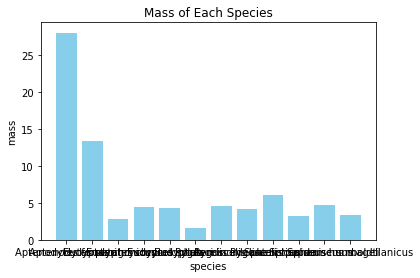

In [21]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species?  Eudyptula minor
## *Q2* What is the geographical range of this species? 26.4


import matplotlib.pyplot as plt

plt.bar(penguins_df['species'], penguins_df['mass'], color='skyblue')
plt.xlabel('species')
plt.ylabel('mass')
plt.title('Mass of Each Species')
plt.show()

## 9

In [22]:
import seaborn as sns

/opt/rit/el9/20230413/app/linux-rhel9-x86_64_v3/gcc-11.2.1/py-seaborn-0.12.2-omixkokge2i67u7apvehqk2fqduysrz2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


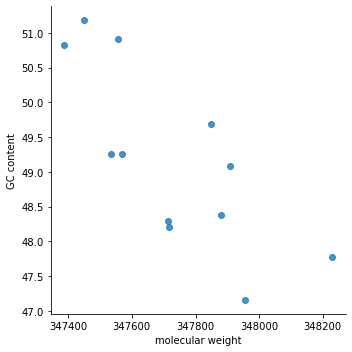

In [24]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).


sns.lmplot(x="molecular weight", y="GC content", data=penguins_df, fit_reg=False)

## 10

In [27]:
 ## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv('penguins_mass_cytb.csv')

## 11

In [ ]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)